<a href="https://colab.research.google.com/github/Fredrick-kyalo/Text_classification/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets -q

In [ ]:
from datasets import load_dataset
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

print(tf.__version__)

2.12.0


In [ ]:
dataset = load_dataset("nanyy1025/covid_fake_news")
dataset

  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'tweet', 'label'],
        num_rows: 6420
    })
    validation: Dataset({
        features: ['id', 'tweet', 'label'],
        num_rows: 2140
    })
    test: Dataset({
        features: ['id', 'tweet', 'label'],
        num_rows: 2140
    })
})

In [ ]:
train_texts = dataset['train']['tweet']
train_labels = dataset['train']['label']

test_texts = dataset['test']['tweet']
test_labels = dataset['test']['label']

val_texts = dataset['validation']['tweet']
val_labels = dataset['validation']['label']


print(len(train_texts))
print(len(test_texts))
print(len(val_texts))

6420
2140
2140


In [ ]:
df = pd.DataFrame()
df['text'] = train_texts + test_texts + val_texts
df['label'] = train_labels + test_labels + val_labels
df

,text,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real
...,...,...
10695,Donald Trump wrongly claimed that New Zealand ...,fake
10696,Current understanding is #COVID19 spreads most...,real
10697,Nothing screams “I am sat around doing fuck al...,fake
10698,Birx says COVID-19 outbreak not under control ...,fake


In [ ]:
def enc(label):
    return 1 if label == 'real' else 0

df['y'] = df['label'].apply(lambda x: enc(x))

In [ ]:
df['text'] = df['text'].str.replace('[^\w\s]', '') # removes punctuation
df['text'] = df['text'].str.replace('\d+', '') # removes numbers
df['text'] = df['text'].str.replace('@', '') # removes leading whitespace '@'
df['text'] = df['text'].str.replace('#', '') # removes trailing '#'
df['text'] = df['text'].str.replace('\s+', '') # removes extra whitespace
df['text'] = df['text'].str.lower() # lowercase
df.head()

<ipython-input-7-e6afa15e1edf>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]', '') # removes punctuation
<ipython-input-7-e6afa15e1edf>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+', '') # removes numbers
<ipython-input-7-e6afa15e1edf>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\s+', '') # removes extra whitespace


,text,label,y
0,thecdccurrentlyreportsdeathsingeneralthediscre...,real,1
1,statesreporteddeathsasmallrisefromlasttuesdays...,real,1
2,politicallycorrectwomanalmostusespandemicasexc...,fake,0
3,indiafightscoronawehavecovidtestinglaboratorie...,real,1
4,populousstatescangeneratelargecasecountsbutify...,real,1


In [ ]:
train_texts, test_texts, train_labels, test_labels = train_test_split(df['text'], df['y'], test_size=0.2, random_state = 42)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)
train_seq = tokenizer.texts_to_sequences(train_texts)
test_seq = tokenizer.texts_to_sequences(test_texts)

In [ ]:
max_seq_length = max(max(map(len, train_seq)),  max(map(len, train_seq)))
print(max_seq_length)

10


In [ ]:
train_data = pad_sequences(train_seq, maxlen = max_seq_length)
test_data = pad_sequences(test_seq, maxlen = max_seq_length)

In [ ]:
print('GPU available: ', tf.config.list_physical_devices("GPU"))

GPU available:  []


In [ ]:
model = Sequential()

model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length = max_seq_length))
model.add(LSTM(128))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs = 10, batch_size = 64)

Epoch 1/10
134/134 [==============================] - 16s 99ms/step - loss: 0.6912 - accuracy: 0.5230 - val_loss: 0.6886 - val_accuracy: 0.4832
Epoch 2/10
134/134 [==============================] - 14s 103ms/step - loss: 0.3622 - accuracy: 0.9130 - val_loss: 3.3673 - val_accuracy: 0.5065
Epoch 3/10
134/134 [==============================] - 9s 70ms/step - loss: 0.0044 - accuracy: 0.9998 - val_loss: 3.2636 - val_accuracy: 0.5056
Epoch 4/10
134/134 [==============================] - 7s 49ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.5985 - val_accuracy: 0.5056
Epoch 5/10
134/134 [==============================] - 8s 59ms/step - loss: 7.5663e-04 - accuracy: 1.0000 - val_loss: 3.7682 - val_accuracy: 0.5056
Epoch 6/10
134/134 [==============================] - 6s 44ms/step - loss: 5.1410e-04 - accuracy: 1.0000 - val_loss: 3.9156 - val_accuracy: 0.5056
Epoch 7/10
134/134 [==============================] - 12s 88ms/step - loss: 3.9242e-04 - accuracy: 1.0000 - val_loss: 4.0745 - val_

In [ ]:
loss, acc = model.evaluate(test_data, test_labels)
print(loss)
print(acc)

67/67 [==============================] - 1s 9ms/step - loss: 4.4546 - accuracy: 0.5056
4.454623699188232
0.5056074857711792


In [ ]:
import matplotlib.pyplot as plt

def plot(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

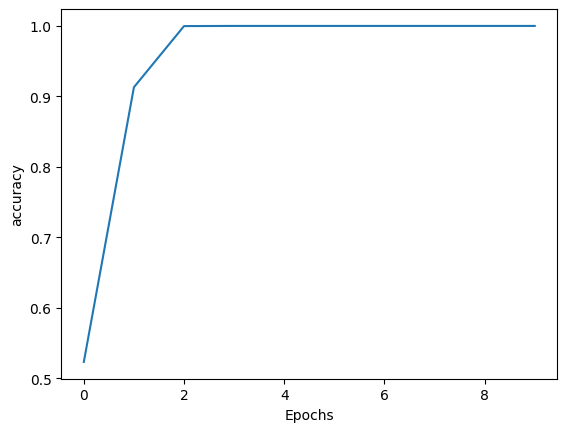

In [ ]:
plot(history, 'accuracy')

In [ ]:
plot(history, 'loss')

In [ ]:
import numpy as np

def classify_text